<function matplotlib.pyplot.show(*args, **kw)>

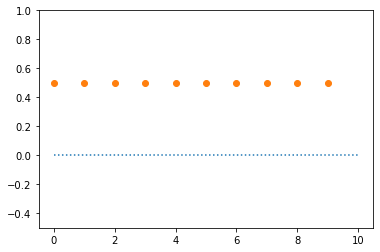

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
y = np.zeros(N)
x1 = np.linspace(0, 10, N)
x2 = np.linspace(0,10,N, endpoint=False)
plt.ylim(-0.5, 1)
plt.plot(x1, y, ':')
plt.plot(x2, y + 0.5, 'o')
plt.show

In [94]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('./data_samples/SLRM/toy_data.csv', delimiter=',')
X = data[:,0].reshape(-1,1)
X.shape

(100, 1)

In [95]:
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X], 1)
y = data[:,1].reshape(-1,1)

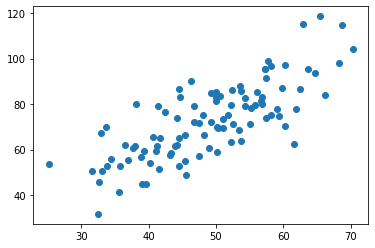

In [96]:
plt.scatter(data[:, 0].reshape(-1,1), y)
plt.show()

In [127]:
alpha = 0.0001
iters = 10000
theta = np.array([[1.0, 1.0]])

In [90]:
theta.shape

(1, 2)

In [89]:
theta.T.shape

(2, 1)

In [91]:
X.shape

(100, 3)

In [112]:
def cost(X,y, theta):
    error = np.power(((X @ theta.T) - y) , 2)
    return np.sum(error) / (2*len(X))

In [113]:
cost(X,y,theta)

319.40631589398157

In [136]:
def gd(X,y,theta,alpha,iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T -y) * X, axis=0)
        c = cost(X,y,theta)
#         if i % 100 == 0:
#             print(c)
    return theta, c

In [137]:
g, c = gd(X,y,theta,alpha, iters)
print(g,c)

[[1.26761621 1.4545775 ]] 55.981994934756045


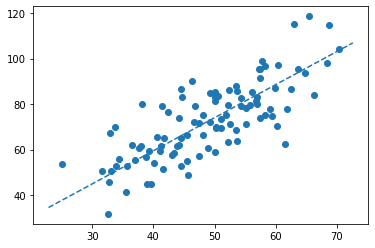

In [138]:
plt.scatter(data[:,0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = g[0][0] + g[0][1] *x_vals
plt.plot(x_vals,y_vals, '--')
plt.show()

In [3]:
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
a.shape


(3, 4)

In [19]:
b = a.reshape(-1)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [20]:
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
d = b.reshape(1,-1)
d

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [22]:
d.shape

(1, 12)

In [23]:
b.shape

(12,)

In [24]:
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [77]:
a = np.array([
    [1, 2, 3], 
    [4, 5, 6]
])
b = np.array([
    [7, 8, 9],
    [10, 11, 12]
])

In [79]:
np.concatenate((a, b), axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [80]:
x1 = range(6)

In [81]:
x1

range(0, 6)

array([  0,   1,   8,  27,  64, 125], dtype=int32)

In [235]:
import numpy as np

class LR:  
    def __init__(self, rate):
        self.m = 0
        self.b = 0
        self.learning_rate = rate

    def cost_function(self, x, y):
        totalError = 0
        for i in range(0, len(x)):
            totalError += ((self.m* x[i] + self.b) - y[i])**2
        return totalError/float(len(x))

    def fit(self, x, y, num_iterations):
        N = float(len(x))
        for j in range(num_iterations):
            b_gradient = 0
            m_gradient = 0
            for i in range(0, len(x)):
                b_gradient += -(2/N) * (y[i] - ((self.m * x[i]) + self.b))
                m_gradient += -(2/N) * (y[i] - ((self.m * x[i]) + self.b)) * x[i]
            self.b -= (self.learning_rate * b_gradient)
            self.m -= (self.learning_rate * m_gradient)
            if j % 50 == 0:
                print('error:', self.cost_function(x, y))

    def predict(self, xs):
        return [(self.m * x + self.b) for x in xs]

# Testing functionality
if __name__ == '__main__':
    x = np.linspace(0, 100, 50)
    delta = np.random.uniform(-10, 10, x.size)
    y = 0.5 * x + 3 + delta

    model = LR(0.01)
    model.fit(x, y, 100)
    print('Error:', model.cost_function(x, y))

error: 5025895.46357562
error: 7.81663316688924e+188
Error: inf


C:\Python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':


In [ ]:
X = np.append(np.ones((m,1)), df['TV'].values.reshape(m,1), axis=1)

y = df['Sales'].values.reshape(m,1)

theta_params = np.zeros((2,1))
def cost_fun(X, y, theta_params):
        y_predict = np.dot(X, theta_params)
        sqrd_error = (y_predict - y ) ** 2 
        cost = 1/(2*m) * np.sum(sqrd_error)
        return cost

cost = cost_fun(X, y, theta_params)
print(f'when theta params all zeroes cost is : {cost}')
def gd(X,y,theta_params, alpha, iterations):
    cost = []
    for i in range(iterations):
        y_pred = np.dot(X, theta_params)
        der = np.dot(X.transpose(), (y_pred-y)) / m
        theta_params -= alpha * der
        cost.append(cost_fun(X, y, theta_params))
    return theta, cost

theta, cost = gd(X,y, theta_params, alpha = 0.000065, iterations = 400000)
theta
fix, ax = plt.subplots(figsize= (9, 6))
ax.plot(cost)
fig, ax = plt.subplots(figsize=(9, 6))
fit = np.round(theta_params,3)
x_val = np.array(range(0,303))
y_val = fit[0, 0] + (fit[1, 0] * x_val)
sns.lineplot(x_val, y_val, ax=ax, color='blue')
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

In [261]:
import numpy as np

class SLR():
    
    def __init__(self, lr):
        self.theta0 = 0
        self.theta1 = 0
        self.learning_rate = lr
        
        
    def cost_function(self, x, y):
        error = 0
        for i in range(len(x)):
            error += (hypothesis(x[i]) - y[i]) **2
        return error/(2*float(len(x)))
       

    def gradient_descent(self, x, y, iters):
        m = float(len(x))
        for j in range(iters):
            b_gradient = 0
            m_gradient = 0
         
            b_gradient = b_gradient-(1/m) * np.sum(y - self.predict(x))
            m_gradient = m_gradient-(1/m) * np.sum(x * y - self.predict(x))
            self.theta0 -= (self.learning_rate * b_gradient)
            self.theta1 -= (self.learning_rate * m_gradient)
            if j % 50 == 0:
                print('error:', self.cost_function(x, y))
    
#         m = len(x)
#         for i in range(iters):
            
            
#             dt0 = -(2/m) * np.sum(y[i] - self.hypothesis(x[i]))
#             dt1 = -(2/m) * np.sum(x[i] * y[i] - self.hypothesis(x[i]))
#             self.theta0 -= self.learning_rate * dt0
#             self.theta1 -= self.learning_rate * dt1
#             print(f'theta0: {self.theta0}, theta1: {self.theta1}, cost: {cost} iteration: {i}')
    
    def hypothesis(self, x):
        return self.theta0 + (self.theta1 * x)
    
    def predict(self, xs):
        return [(self.theta0 + self.theta1 * x) for x in xs]
    
    def get_params(self):
        return self.theta0, self.theta1

# Testing functionality
if __name__ == '__main__':
    x = np.linspace(0, 100, 20)
    delta = np.random.uniform(-30, 15, x.size)
    y = 0.5 * x + 3 + delta
#     x = np.array([1, 1, 2, 3 ,4 , 5, 6, 7, 8, 9, 10, 11])
#     y = np.array([1, 2, 3, 1, 4 , 5, 6, 4, 7, 10 , 15, 9])
    model = SLR(0.01)
    model.gradient_descent(x, y, 100)
    print('Error:', model.cost_function(x, y))
#     plt.plot(x, y , 'o')
#     model = SLR(0.0001)
#     model.fit(x, y, 200)
#     print('Error:', model.cost_function(x, y))
    

error: 502.8861744871584
error: 502.8861744871584
Error: 502.8861744871584


In [ ]:

class LinearRegression():
    def __init__(self, th_0=0, th_1=1, lr=0.01): 
        self.lr=lr
        self.th_0=np.array([[th_0]])
        self.th_1=np.array([th_1])
        print(th_0)
        print(th_1)
    def cost(self,x,y):     
        y_pred = self.b + x@self.w  # predicted y-values
        e=y - y_pred                  # error term
        return np.mean(e**2)      # mean squared error
    
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    # number of training samples
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


    def fit(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        dJ_dw=(np.mean(e*(-2*x), axis=0)) # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0)) # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db    # update b

    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values

    def params(self):
        return (self.w,self.b)   # return parameters

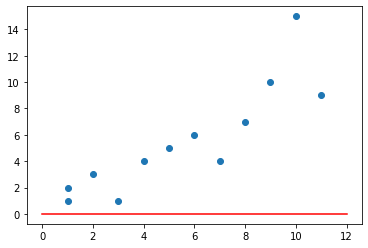

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_points = [1, 1, 2, 3 ,4 , 5, 6, 7, 8, 9, 10, 11]
y_points = [1, 2, 3, 1, 4 , 5, 6, 4, 7, 10 , 15, 9]

plt.plot(x_points, y_points, 'o')
theta_0 = 0
theta_1 = 0

hypothesis = lambda x: theta_0 + theta_1 * x

def predict(y, data_points):
    x_values = [i for i in range(int(min(data_points)) -1 , int(max(data_points)) + 2 )]
    y_values = [hypothesis(x) for x in x_values]
    plt.plot(x_values, y_values, 'r')

predict(y, x_points)

learn = .0001
epoch = 1000
def summation(x_points, y_points):

    total1 = 0
    total2 = 0
    
    for i in range(1, len(x_points)):
        total1 += (hypothesis(x_points[i]) - y_points[i])
        total2 += (hypothesis(x_points[i]) - y_points[i]) * x_points[i]
    
    return total1/(2*len(x_points)), total2/(2* len(x_points))

for i in range(epoch):
    s1, s2 = summation(x_points, y_points)
    theta_0 = theta_0 - learn * s1
    theta_1 = theta_1 - learn * s2
    
#plt.plot(x_points, y_points, 'o')
#predict(y, x_points)

## Implementation b

The easiest way is using vecotrized forms, means we can take advatage of matrix multiplication. And matrix is used as a structure that we hold our data and parameters.

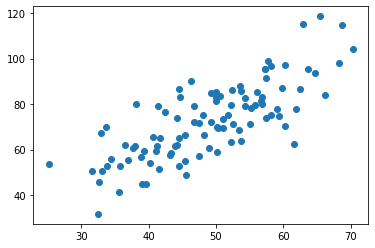

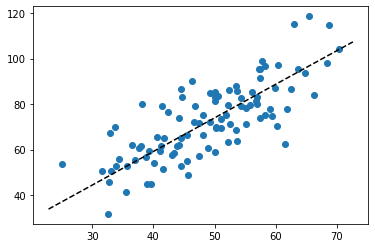

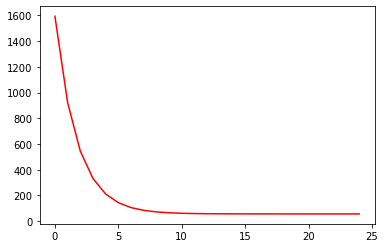

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('./data_samples/SLRM/toy_data.csv', delimiter=',')
X = data[:,0].reshape(-1,1)
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X], 1)
y = data[:,1].reshape(-1,1)
plt.scatter(data[:, 0].reshape(-1,1), y)
plt.show()

alpha = 0.0001
iters = 25
theta = np.array([[0.0, 0.0]])

# square error 
def get_error(X,y, theta):
    error = ((X @ theta.T) - y)**2
    return np.sum(error) / (2*len(X))

# gradient descent
def gd(X,y,theta,alpha,iters):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T -y) * X, axis=0)
        cost[i] = get_error(X,y,theta)
#         if i % 100 == 0:
#             print(cost[i])
    return theta, cost

params, cost = gd(X,y,theta,alpha, iters)
plt.scatter(data[:,0].reshape(-1,1), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = params[0][0] + params[0][1] * x_vals
plt.plot(x_vals,y_vals, '--', color='k')
plt.show()
plt.plot(np.arange(iters), cost, 'r')

theta0: 0.14044444444444443, theta1: 0.9271111111111111, cost: 339.3333333333333 iteration: 0
theta0: 0.23773629629629628, theta1: 1.5437629629629628, cost: 156.25476609053499 iteration: 1
theta0: 0.306294929382716, theta1: 1.95374244345679, cost: 75.10351445675137 iteration: 2
theta0: 0.3557193569553909, theta1: 2.2261406629820577, cost: 39.12231291668377 iteration: 3
theta0: 0.392399669822339, theta1: 2.406951692453076, cost: 23.158679165871998 iteration: 4
theta0: 0.4205897735169986, theta1: 2.526793863407632, cost: 16.0660689336228 iteration: 5
theta0: 0.44312151129882776, theta1: 2.6060498509216026, cost: 12.904792744281705 iteration: 6
theta0: 0.4618800570777689, theta1: 2.658288435751548, cost: 11.485783491035088 iteration: 7
theta0: 0.478120385311521, theta1: 2.6925423773486257, cost: 10.838936596123483 iteration: 8
theta0: 0.4926779455670023, theta1: 2.7148247978885984, cost: 10.534341463032808 iteration: 9
theta0: 0.5061089089426276, theta1: 2.7291386417598784, cost: 10.38147

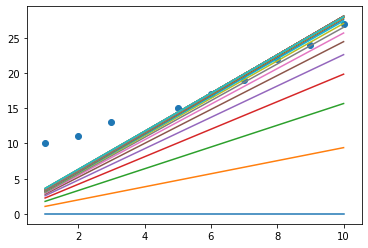

In [353]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
def gradient_descent(x,y):
    th0 = th1 = 0
    iters = 50
    m = len(x)
    learn_rate = .008
    for i in range(iters):
        y_predicted = th0 + th1 * x
        cost = (1/m) * sum([val**2 for val in (y - y_predicted)])
        th0d = -(1/m) * sum((y - y_predicted))
        th1d = -(1/m) * sum(x *(y - y_predicted))   
        th0 -= learn_rate * th0d
        th1 -= learn_rate * th1d   
        print(f'theta0: {th0}, theta1: {th1}, cost: {cost} iteration: {i}')
        plt.plot(x, y_predicted)
        
x = np.array([1, 2, 3, 5 ,6 , 7, 8, 9, 10])
y = np.array([10, 11, 13, 15, 17 , 19, 22, 24,27])

gradient_descent(x, y)
plt.scatter(x,y)
plt.show()



    


## Least squares with polynomial features fit

In [17]:
#matplotlib inline
%matplotlib notebook
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [31]:
X = [[x/12+ random.uniform(-1,1) for x in range(0,50)], [2**(x/12)+ random.uniform(-1,1) for x in range(0,50)]]

theta = [0.2, 0.03, 0.7, 0.002, 0.04]
def var(i):
    return random.uniform(-(i[0]+i[1])/4,(i[0]+i[1])/4)

def y_of_x(xa):
    return theta[0]*xa[0]**2 + theta[1]*xa[0]*xa[1] + theta[2]*xa[0] + theta[3]*xa[1]**2 + theta[4]*xa[1] + 2.0 + var(xa)

Y = []
for xa in np.transpose(X):
    Y.append(y_of_x(xa))

<IPython.core.display.Javascript object>


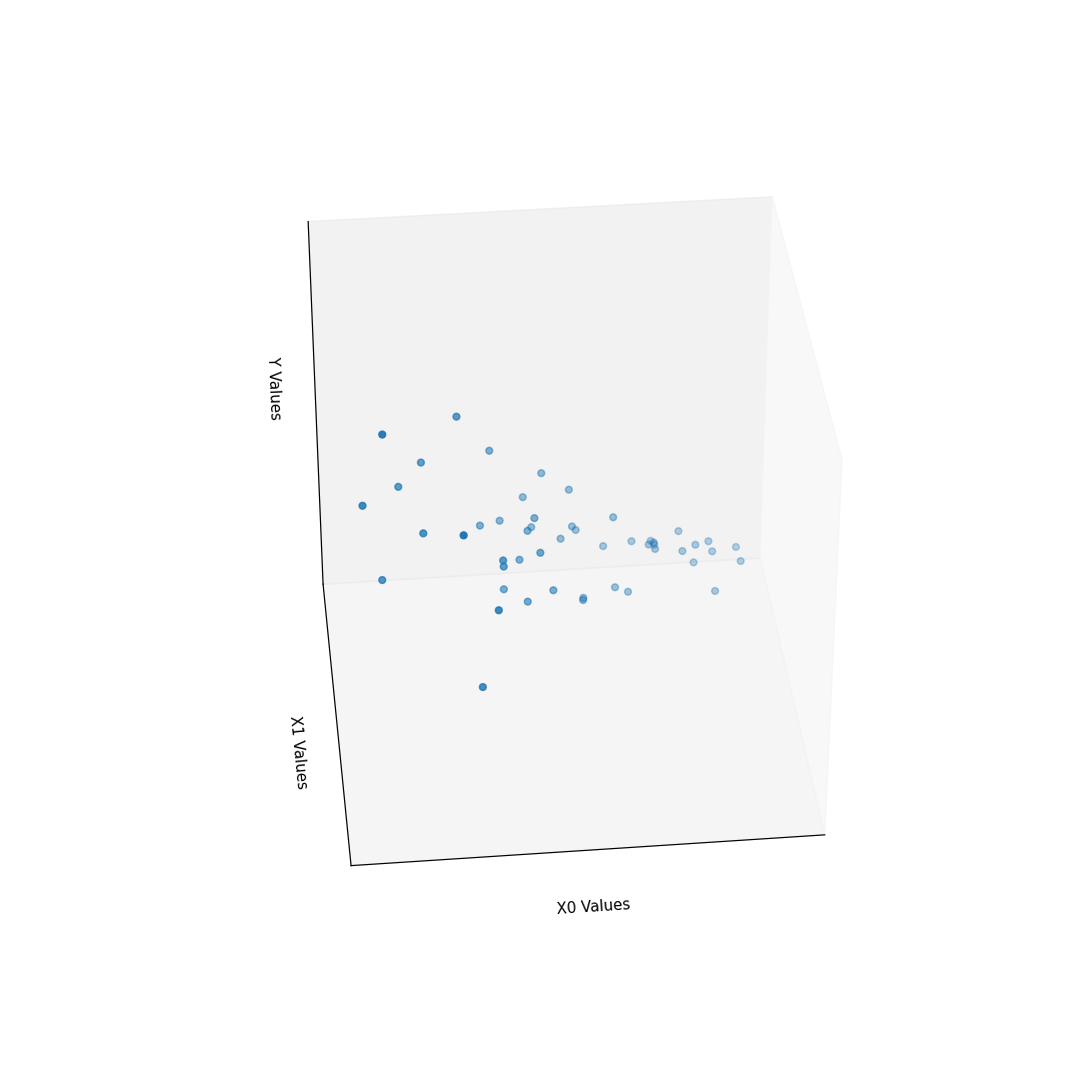

[]

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[0], X[1], Y)
ax.set_xlabel('X0 Values')
ax.set_ylabel('X1 Values')
ax.set_zlabel('Y Values')


ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

In [4]:
xs = []
ys = []
m = 100
xs.append([(5 * np.random.rand(m, 1) - 2) for i in range(100)])
ys.append([0.2*x + 0.5*x**2 for x in xs])

TypeError: can't multiply sequence by non-int of type 'float'

In [93]:
import pandas as pd

In [94]:
url = 'housing.csv'
df = pd.read_csv(url)

In [95]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [96]:
df_float = df.select_dtypes(include=['float64']).copy()

In [97]:
df_float['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=False)
df_float['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=False)
df_float['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=False)

In [98]:
frontage = df_float[['LotFrontage']]
price = df['SalePrice']

In [66]:
import matplotlib.pyplot as plt

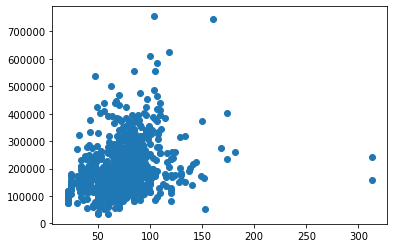

In [67]:
plt.scatter(frontage, price)
plt.show();

In [23]:
setas =  pd.DataFrame([df_float[['LotFrontage']],df['SalePrice']])

In [99]:
data = [frontage, price]
headers = ["frontage", "price"]
df3 = pd.concat(data, axis=1)

In [100]:
df3.to_csv('housing_stripped.csv', index=False)

In [116]:
url = 'housing_stripped.csv'
data = pd.read_csv(url)
xs = data['LotFrontage'].to_numpy()
ys = data['SalePrice'].to_numpy()

In [119]:
ys.shape

(1460,)

In [109]:
frame

,LotFrontage,SalePrice
0,65.0,208500
1,80.0,181500
2,68.0,223500
3,60.0,140000
4,84.0,250000
...,...,...
1455,62.0,175000
1456,85.0,210000
1457,66.0,266500
1458,68.0,142125


In [121]:
xs.size

1460

In [113]:
ys = frame['SalePrice'].to_numpy()

In [120]:
ys.size

1460

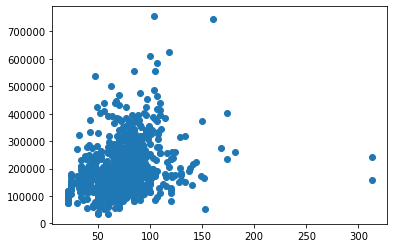

In [122]:
plt.scatter(xs, ys)
plt.show();